In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load in our data
airbnb = pd.read_csv("dataset/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [3]:
airbnb["price"].mean()

np.float64(249.16526273565984)

In [ ]:
#np.random.seed(100)
airbnb.sample(n=100)["price"].mean()

np.float64(202.8)

In [19]:
sample_list = [] #create an empty list
for i in range(20_000):
    sample = airbnb.sample(n = 100)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)

In [20]:
samples = pd.concat(sample_list)
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
442,1.230478e+07,Hastings-Sunrise,Entire home/apt,5,2.0,2.0,3.0,86,0
1710,3.632464e+07,Mount Pleasant,Entire home/apt,4,1.0,2.0,2.0,148,0
1307,2.915890e+07,Downtown,Entire home/apt,4,NaN,1.0,NaN,130,0
197,4.104870e+06,Grandview-Woodland,Entire home/apt,5,1.0,1.0,3.0,65,0
1847,3.905803e+07,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,0.0,150,0
...,...,...,...,...,...,...,...,...,...
1445,3.229131e+07,West Point Grey,Entire home/apt,4,1.0,1.0,2.0,135,19999
2556,5.162170e+07,Mount Pleasant,Entire home/apt,1,1.0,1.0,1.0,193,19999
2048,4.271539e+07,Renfrew-Collingwood,Private room,1,NaN,1.0,NaN,161,19999
2747,5.390865e+07,West End,Entire home/apt,1,1.0,1.0,1.0,201,19999


In [21]:
sample_estimates = samples.groupby("replicate")["price"].mean().reset_index(name = "sample_mean")

In [22]:
sample_estimates

,replicate,sample_mean
0,0,241.04
1,1,223.84
2,2,249.78
3,3,235.58
4,4,241.79
...,...,...
19995,19995,244.19
19996,19996,213.58
19997,19997,306.21
19998,19998,231.62


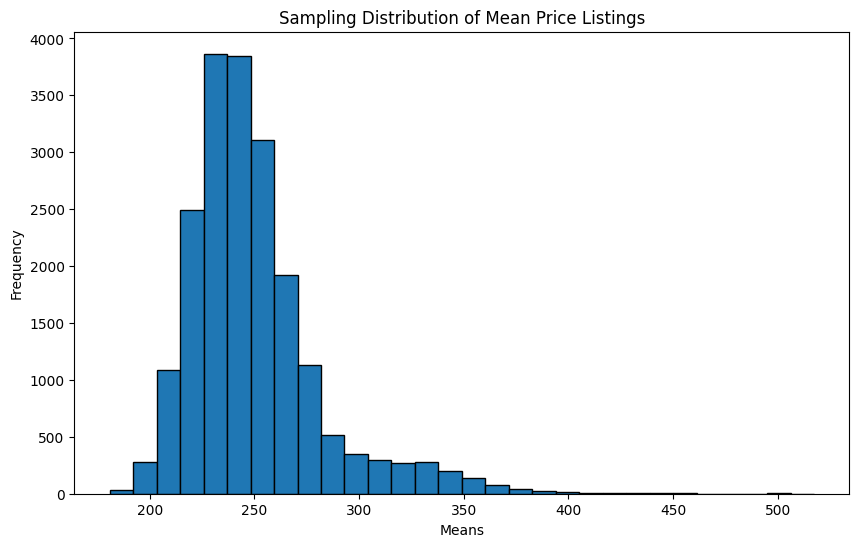

In [23]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [24]:
#bootstrapping
np.random.seed(1234)
one_sample = airbnb.sample(n=40)
one_sample

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
2912,5.970000e+17,Riley Park,Entire home/apt,9,3.0,4.0,5.0,214
787,1.986261e+07,Mount Pleasant,Entire home/apt,9,2.0,3.0,3.0,109
2696,5.333958e+07,Arbutus Ridge,Entire home/apt,3,1.0,1.0,0.0,200
3017,6.310000e+17,West End,Entire home/apt,2,1.0,1.0,0.0,223
1226,2.745958e+07,Downtown,Entire home/apt,1,NaN,1.0,NaN,126
2620,5.255417e+07,Downtown Eastside,Entire home/apt,4,1.0,1.0,2.0,198
4883,9.790000e+17,Downtown Eastside,Entire home/apt,7,2.0,3.0,4.0,834
608,1.554257e+07,Kitsilano,Entire home/apt,5,1.0,2.0,3.0,99
1400,3.124019e+07,Arbutus Ridge,Private room,2,1.0,1.0,2.0,133
149,3.100878e+06,Downtown,Entire home/apt,2,1.0,1.0,0.0,60


In [25]:
one_sample["price"].mean()

np.float64(219.85)

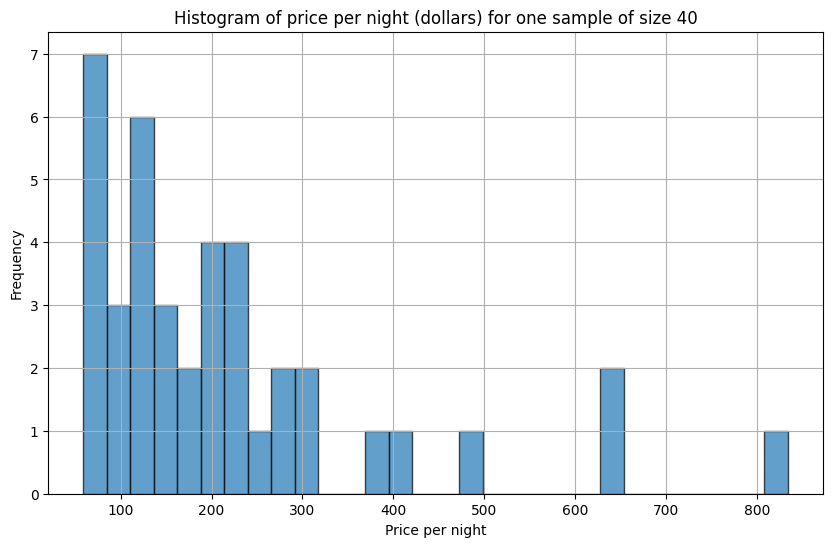

In [26]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [27]:
boot1 = one_sample.sample(frac = 1, replace = True)

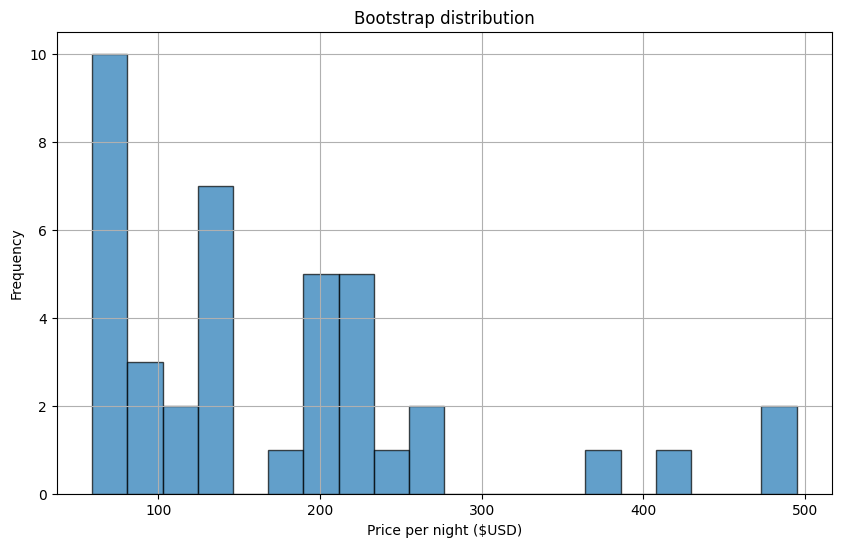

In [28]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [29]:
bootstrap_samples = [] #initialize an empty list
for i in range(20_000):
    sample = one_sample.sample(frac = 1, replace = True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)

In [30]:
boot20000 = pd.concat(bootstrap_samples)
boot20000

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
2480,5.073003e+07,Oakridge,Entire home/apt,3,NaN,2.0,NaN,188,0
4419,9.120000e+17,Downtown,Entire home/apt,4,1.5,2.0,2.0,409,0
273,6.315732e+06,Fairview,Entire home/apt,3,1.0,1.0,2.0,70,0
548,1.455531e+07,Grandview-Woodland,Entire home/apt,2,NaN,1.0,NaN,95,0
3795,8.020000e+17,Riley Park,Entire home/apt,4,1.0,2.0,2.0,298,0
...,...,...,...,...,...,...,...,...,...
3560,7.510000e+17,Kitsilano,Entire home/apt,4,1.0,1.0,2.0,269,19999
1465,3.287258e+07,Kitsilano,Entire home/apt,4,2.0,2.0,2.0,136,19999
3115,6.550000e+17,Downtown,Entire home/apt,5,2.0,3.0,3.0,230,19999
2480,5.073003e+07,Oakridge,Entire home/apt,3,NaN,2.0,NaN,188,19999


In [31]:
boot_means = boot20000.groupby("replicate")["price"].mean().reset_index(name="mean_price")
boot_means

,replicate,mean_price
0,0,208.250
1,1,205.800
2,2,183.925
3,3,211.600
4,4,239.475
...,...,...
19995,19995,176.725
19996,19996,217.450
19997,19997,204.600
19998,19998,216.900


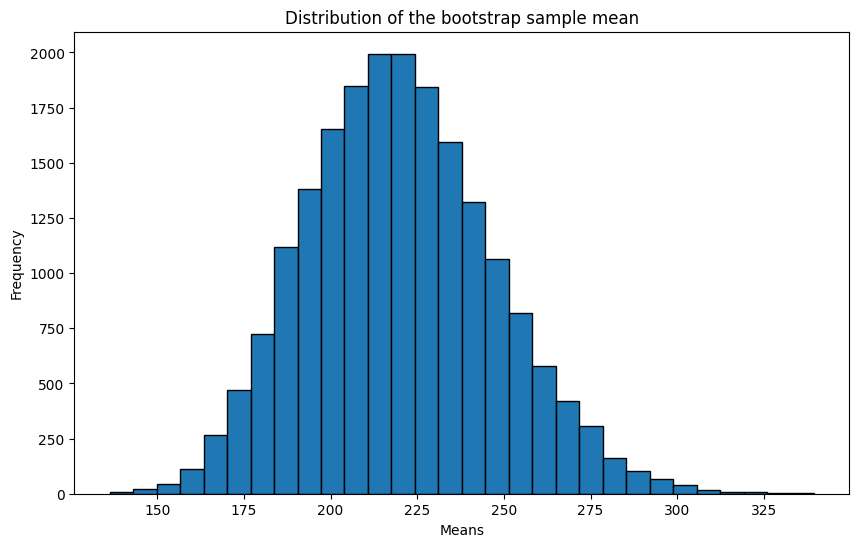

In [33]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [34]:
#confidence interval 
boot_means["mean_price"].quantile([0.025,0.975])

0.025    171.248750
0.975    276.300625
Name: mean_price, dtype: float64